# Dataset from Kaggle

### Step 1: Import necessary libraries

In [ ]:
#import pandas as pd
import numpy as np
import os
import cv2
import time
import matplotlib.pyplot as plt

#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Machine Learning models/algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [87]:
# # Test display image
# img = cv2.imread("dataset/original/healthy/IMG (5).jpg")

# center_y = img.shape[0] // 2
# center_x = img.shape[1] // 2
# start_y = center_y - 1000
# start_x = center_x - 1000
# end_y = center_y + 1000
# end_x = center_x + 1000
# img = img[start_y:end_y, start_x:end_x]

# cv2.imshow('original', img)
# while True:
#     k = cv2.waitKey(1) & 0xFF
#     # when escape pressed or if window goes out of focus, close image window
#     if k == 27 or \
#     cv2.getWindowProperty('original', cv2.WND_PROP_VISIBLE) < 1:
#         break
# cv2.destroyAllWindows()

In [88]:
# # Test display image
# img = cv2.imread("dataset/processed-images/healthy/IMG (5).jpg")

# center_y = img.shape[0] // 2
# center_x = img.shape[1] // 2
# start_y = center_y - 1000
# start_x = center_x - 1000
# end_y = center_y + 1000
# end_x = center_x + 1000
# img = img[start_y:end_y, start_x:end_x]

# cv2.imshow('original', img)
# while True:
#     k = cv2.waitKey(1) & 0xFF
#     # when escape pressed or if window goes out of focus, close image window
#     if k == 27 or \
#     cv2.getWindowProperty('original', cv2.WND_PROP_VISIBLE) < 1:
#         break
# cv2.destroyAllWindows()

### Step 2: Preprocess the data
There will be 3 types of processed data:
- grayscaled
- colored
- masked or selectively cropped (the leaf is preserved, backgrounds become white)

Here is what we need to do for grayscale:
- crop image
- grayscale image
- convert the image into a 1 dimensional `numpy` array
- label the data so we can identify individual images within the array

In [89]:
def crop_image(file_path: str):
    """Returns an OpenCV object image\n
    Given a file path, this function preserves the color of the image,\n
    crops it to 2000x2000 pixels, and finally converts it into a 1-dimensional array
    """
    # convert the image into a 3 dimensional numpy array
    # select only a portion of the numpy array to represent an 2000x2000 pixels cropped image
    # we can find center of image by halving the image dimensions
    # calculate crop boundaries (1000 pixels in each direction from center)
    
    # we can try increasing size of image once we get sufficient accuracy
    img = cv2.imread(file_path)
    center_y = img.shape[0] // 2
    center_x = img.shape[1] // 2
    start_y = center_y - 1000
    start_x = center_x - 1000
    end_y = center_y + 1000
    end_x = center_x + 1000
    return img[start_y:end_y, start_x:end_x]

In [90]:
def grayscale_image(file_path: str):
    """Returns a 1-dimensional numpy array that represents a grayscale image\n
    Given a file path, this function turns the provided image file grayscale\n
    and converts it into a 1-dimensional array
    """
    # convert the image into a 3 dimensional numpy array,
    # then make the image grayscale, reducing it to a 2d numpy array
    # flatten 2d array into 1d
    return cv2.cvtColor(crop_image(file_path), cv2.COLOR_BGR2GRAY).ravel()

In [ ]:
def preprocess_images(imgs_per_category: int):
    """Crop all categories of images of cauliflower leaf, then return as array"""
    X = [] # features
    y = [] # labels
    start_time = time.time()
    # preprocess images from each disease category
    # then add the preprocessed images to the dataset while labelling them
    for category in ['Healthy', 'Black-Rot', 'Insect-Hole']:
        for file_name in os.listdir(f"dataset/original/{category}/")[:imgs_per_category]:
            # crop the image and reduce dimensionality of array
            X.append(crop_image(f"dataset/original/{category}/{file_name}").ravel())
            y.append(category) # label corresponding data

    # convert to numpy arrays and return training and testing data
    X = np.array(X)
    y = LabelEncoder().fit_transform(np.array(y))

    end_time = time.time()
    print(f"Preprocessed {3*imgs_per_category} images in {round(end_time - start_time, 2)}s")
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def preprocess_grayscale_images(imgs_per_category: int):
    """Crop and grayscale all categories of images of cauliflower leaf, then return as array"""
    X = [] # features
    y = [] # labels
    start_time = time.time()
    # preprocess images from each disease category
    # then add the preprocessed images to the dataset while labelling them
    for category in ['Healthy', 'Black-Rot', 'Insect-Hole']:
        for file_name in os.listdir(f"dataset/original/{category}/")[:imgs_per_category]:
            X.append(grayscale_image(f"dataset/original/{category}/{file_name}"))
            y.append(category) # label corresponding data

    # convert to numpy arrays and return training and testing data
    X = np.array(X)
    y = LabelEncoder().fit_transform(np.array(y))

    end_time = time.time()
    print(f"Preprocessed with grayscale {3*imgs_per_category} images " +
          f"in {round(end_time - start_time, 2)}s")
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def preprocess_grayscale_subject_images(imgs_per_category: int):
    X = [] # features
    y = [] # labels
    start_time = time.time()
    # preprocess images from each disease category
    # then add the preprocessed images to the dataset while labelling them
    for category in ['Healthy', 'Black-Rot', 'Insect-Hole']:
        for file_name in os.listdir(f"dataset/processed-images/{category}/")[:imgs_per_category]:
            X.append(grayscale_image(f"dataset/processed-images/{category}/{file_name}"))
            y.append(category) # label corresponding data

    # convert to numpy arrays and return training and testing data
    X = np.array(X)
    y = LabelEncoder().fit_transform(np.array(y))

    end_time = time.time()
    print(f"Preprocessed masked subject with grayscale {3*imgs_per_category} images " +
          f"in {round(end_time - start_time, 2)}s")
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def preprocess_highlighted_subject_images(imgs_per_category: int):
    X = [] # features
    y = [] # labels
    start_time = time.time()
    # preprocess images from each disease category
    # then add the preprocessed images to the dataset while labelling them
    for category in ['Healthy', 'Black-Rot', 'Insect-Hole']:
        for file_name in os.listdir(f"dataset/processed-images/{category}/")[:imgs_per_category]:
            # crop the image and reduce dimensionality of array
            X.append(crop_image(f"dataset/processed-images/{category}/{file_name}").ravel())
            y.append(category) # label corresponding data

    # convert to numpy arrays and return training and testing data
    X = np.array(X)
    y = LabelEncoder().fit_transform(np.array(y))

    end_time = time.time()
    print(f"Preprocessed masked subject {3*imgs_per_category} images " +
          f"in {round(end_time - start_time, 2)}s")
    return train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Model Selection
- Train model on preprocessed grayscale images
- Run at least 3 machine learning algorithms on the dataset
- Run `sklearn.classification_report()` to evaluate model accuracy, precision, recall, f1-score, and support

In [95]:
svc_model_linear = SVC(kernel='linear', C=1.0, random_state=42)
preprocessed_img_cnt = 70
X_train, X_test, y_train, y_test = preprocess_grayscale_images(preprocessed_img_cnt)

start_time = time.time()
svc_model_linear.fit(X_train, y_train)
end_time = time.time()
print(f"Linear SVC Model c=1, {round(end_time - start_time, 2)}s to train")
print(classification_report(y_test, svc_model_linear.predict(X_test)))

Preprocessed with grayscale 210 images in 13.58s
Linear SVC Model c=1, 181.83s to train
              precision    recall  f1-score   support

           0       0.53      0.57      0.55        14
           1       0.11      0.09      0.10        11
           2       0.61      0.65      0.63        17

    accuracy                           0.48        42
   macro avg       0.42      0.44      0.43        42
weighted avg       0.45      0.48      0.46        42



In [96]:
svc_model = SVC(kernel='rbf', random_state=42)
# preprocessed_img_cnt = 100
X_train, X_test, y_train, y_test = preprocess_grayscale_images(preprocessed_img_cnt)

start_time = time.time()
svc_model.fit(X_train, y_train)
end_time = time.time()
print(f"SVC rbf model kernel, {round(end_time - start_time, 2)}s to train")
print(classification_report(y_test, svc_model.predict(X_test)))

Preprocessed with grayscale 210 images in 13.6s
SVC rbf model kernel, 201.4s to train
              precision    recall  f1-score   support

           0       0.41      0.50      0.45        14
           1       0.30      0.27      0.29        11
           2       0.53      0.47      0.50        17

    accuracy                           0.43        42
   macro avg       0.42      0.41      0.41        42
weighted avg       0.43      0.43      0.43        42



In [97]:
dct_model = DecisionTreeClassifier(max_depth=3, random_state=42)
# preprocessed_img_cnt = 100
X_train, X_test, y_train, y_test = preprocess_grayscale_images(preprocessed_img_cnt)

start_time = time.time()
dct_model.fit(X_train, y_train)
end_time = time.time()
print(f"DecisionTreeClassifier Model max_depth=3, {round(end_time - start_time, 2)}s to train")
print(classification_report(y_test, svc_model.predict(X_test)))

Preprocessed with grayscale 210 images in 13.35s
DecisionTreeClassifier Model max_depth=3, 196.12s to train
              precision    recall  f1-score   support

           0       0.41      0.50      0.45        14
           1       0.30      0.27      0.29        11
           2       0.53      0.47      0.50        17

    accuracy                           0.43        42
   macro avg       0.42      0.41      0.41        42
weighted avg       0.43      0.43      0.43        42



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
preprocessed_img_cnt = 100
X_train, X_test, y_train, y_test = preprocess_grayscale_images(preprocessed_img_cnt)

start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
print(f"RandomForestClassifier Model n_estimators=100, {round(end_time - start_time, 2)}s to train")
print(classification_report(y_test, rf_model.predict(X_test)))

Preprocessed with grayscale 1500 images in 103.62s


In [99]:
leaf_only_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# preprocessed_img_cnt = 50
X_train, X_test, y_train, y_test = preprocess_grayscale_subject_images(preprocessed_img_cnt)

start_time = time.time()
leaf_only_rf_model.fit(X_train, y_train)
end_time = time.time()
print(f"RandomForestClassifier Model n_estimators=100, {round(end_time - start_time, 2)}s to train")
print(classification_report(y_test, rf_model.predict(X_test)))

Preprocessed masked subject with grayscale 150 images in 5.15s
RandomForestClassifier Model n_estimators=100, 8.27s to train
              precision    recall  f1-score   support

           0       0.17      0.33      0.22         9
           1       0.12      0.10      0.11        10
           2       0.00      0.00      0.00        11

    accuracy                           0.13        30
   macro avg       0.10      0.14      0.11        30
weighted avg       0.09      0.13      0.10        30



In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(SVC(random_state=42), parameters)
X_train, X_test, y_train, y_test = preprocess_grayscale_subject_images(preprocessed_img_cnt)
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
print(f"GridSearchCV linear and RBF kernel, {round(end_time - start_time, 2)}s to train")
print(classification_report(y_test, clf.predict(X_test)))

In [ ]:
lr_model = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = preprocess_grayscale_subject_images(preprocessed_img_cnt)
start_time = time.time()
lr_model.fit(X_train, y_train)
end_time = time.time()
print(f"Logistic Regression, {round(end_time - start_time, 2)}s to train")
print(classification_report(y_test, lr_model.predict(X_test)))

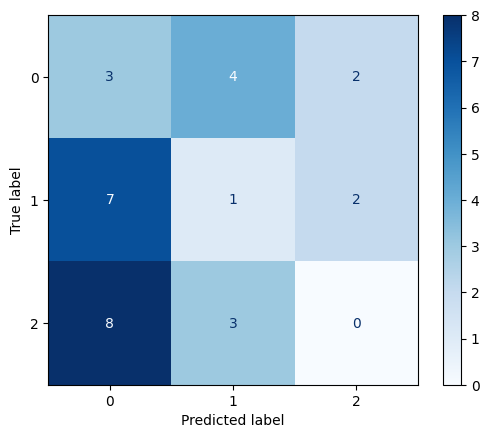

In [100]:
cm = confusion_matrix(y_test, rf_model.predict(X_test), labels=rf_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_).plot(cmap='Blues');

In [101]:
# importance = rf_model.feature_importances_
# plt.bar(range(len(importance)), importance)
# plt.show()

In [102]:
# pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
# X_pca_scaled = pca_scaled.fit_transform(X)
# plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, alpha=0.9)
# plt.xlabel('first principal component')
# plt.ylabel('second principal component');

Recommended concepts to implement:

random forest, logistic regression, principal component analysis,

XGboost (mandatory), dbscan, and gradient descent.

Further concepts (either in code or presentation):

class distribution, dataset size, source crediblity, any challenges (ex: data imbalance/noise)

ROC/AUC analysis, visualization of errors, or any misclassified examples

discuss which diseases are harder to classify, dataset quality, and/or model limitations (ex:overfitting for DecisionTree)